## Logistics Regression From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#
from matplotlib import patches
from pylab import meshgrid


In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def costfunction(h,y_train):
    J=np.mean(-(y_train*np.log(h)+(1-y_train)*np.log(1-h)))
    return J

In [4]:
def gradientdescent(theta,X_train,h,y_train,num_iterations,lr):
    for i in range(num_iterations):
        z=np.dot(X_train,theta)
        h=sigmoid(z)
        gradient=np.dot(X_train.T,(h-y_train))/y_train.size
        theta = theta-lr*gradient
        #print(costfunction(h,y_train))
    return theta

In [5]:
df1=pd.read_excel(r"ex2data1-logistic.xls")
df2=pd.read_excel(r"ex2data2-logistic.xls")

In [6]:
df1.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
df2.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [8]:
idx_1=np.where(df1.y==1)
idx_0=np.where(df1.y==0)

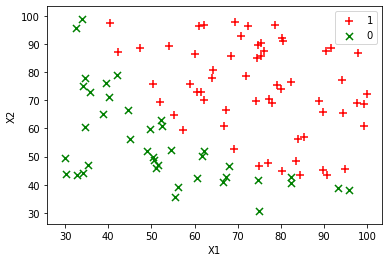

In [9]:
plt.scatter(df1.iloc[idx_1].x1,df1.iloc[idx_1].x2,color='r',s=50,marker='+',label='1')
plt.scatter(df1.iloc[idx_0].x1,df1.iloc[idx_0].x2,color='g',s=50,marker='x',label='0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [10]:
idx2_1=np.where(df2.y==1)
idx2_0=np.where(df2.y==0)

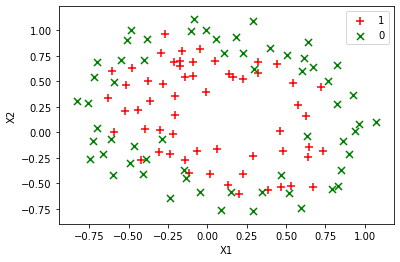

In [11]:
plt.scatter(df2.iloc[idx2_1].x1,df2.iloc[idx2_1].x2,color='r',s=50,marker='+',label='1')
plt.scatter(df2.iloc[idx2_0].x1,df2.iloc[idx2_0].x2,color='g',s=50,marker='x',label='0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [12]:
a,b=df1.shape

In [13]:
X_train,X_test,y_train,y_test,=train_test_split(df1.iloc[:,0:b-1],df1.iloc[:,b-1],test_size=0.1)

In [14]:
X_train=(X_train-X_train.mean())/X_train.std()
X_train.head()

,x1,x2
2,-1.472225,0.323875
13,0.211415,1.653373
93,0.469011,0.963696
71,-0.056084,0.598678
73,-0.235987,0.334203


In [15]:
X_train=X_train.astype(float).values
ones=np.ones((np.size(X_train[:,1]),1))
X_train=np.append(ones,X_train,axis=1)

In [16]:
X_test=X_test.astype(float).values
ones=np.ones((np.size(X_test[:,1]),1))
X_test=np.append(ones,X_test,axis=1)

In [17]:
theta=np.zeros((np.size(X_train[0,:]),1))

In [18]:
z=np.dot(X_train,theta)
h=sigmoid(z)

In [19]:
y_train=y_train.astype(float).values
y_train=np.expand_dims(y_train, axis=1)

In [20]:
J=costfunction(h,y_train)
J

0.6931471805599454

In [21]:
lr=0.03
num_iterations=100000
theta=gradientdescent(theta,X_train,h,y_train,num_iterations,lr)

In [22]:
theta

array([[1.64756871],
       [3.95014474],
       [3.48838124]])

In [23]:
df1.x1=(df1.x1-df1.x1.mean())/df1.x1.std()

In [24]:
df1.x2=(df1.x2-df1.x2.mean())/df1.x2.std()

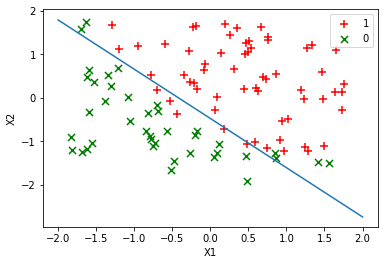

In [25]:
def line(x1,theta):
    x2=-((theta[0]/theta[2])+(theta[1]/theta[2])*x1)
    return x2
x1=np.linspace(-2,2,100)
func=line(x1,theta)
plt.scatter(df1.iloc[idx_1].x1,df1.iloc[idx_1].x2,color='r',s=50,marker='+',label='1')
plt.scatter(df1.iloc[idx_0].x1,df1.iloc[idx_0].x2,color='g',s=50,marker='x',label='0')
plt.plot(x1,func)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [26]:
#### add new columns x1*2 and x2*2 for df2 as hypothesis is in a circle form ########
df2.insert(2,'x1*2',(df2.x1)**2)
df2.insert(3,'x2*2',(df2.x2)**2)

In [27]:
p,q=df2.shape

In [28]:
X_train1,X_test1,y_train1,y_test1,=train_test_split(df2.iloc[:,0:q-1],df2.iloc[:,q-1],test_size=0.1)

In [29]:
X_train1=X_train1.astype(float).values
ones=np.ones((np.size(X_train1[:,1]),1))
X_train1=np.append(ones,X_train1,axis=1)

In [30]:
X_test1=X_test1.astype(float).values
ones=np.ones((np.size(X_test1[:,1]),1))
X_test1=np.append(ones,X_test1,axis=1)

In [31]:
theta1=np.zeros((np.size(X_train1[0,:]),1))

In [32]:
z=np.dot(X_train1,theta1)
h=sigmoid(z)

In [33]:
y_train1=y_train1.astype(float).values
y_train1=np.expand_dims(y_train1, axis=1)

In [34]:
J=costfunction(h,y_train1)
J

0.6931471805599453

In [35]:
lr=0.03
num_iterations=100000
theta1=gradientdescent(theta1,X_train1,h,y_train1,num_iterations,lr)

In [36]:
theta1

array([[ 3.66171681],
       [ 1.31381542],
       [ 2.4170826 ],
       [-8.24207573],
       [-7.5784604 ]])

In [37]:
import cmath as c

In [38]:
def circle(x1,theta1):
    x2=np.sqrt(-((theta1[0]/theta1[4])+(theta1[3]/theta1[4])*(x1**2)))
    return x2

/home/sravanneeli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


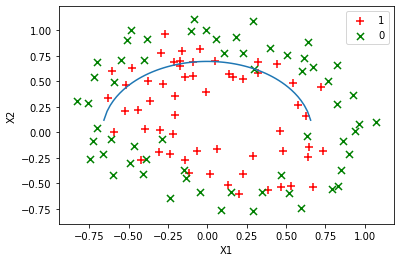

In [39]:
## Non Linear fitting
x1=np.linspace(-1,1,100)
func=circle(x1,theta1)
plt.scatter(df2.iloc[idx2_1].x1,df2.iloc[idx2_1].x2,color='r',s=50,marker='+',label='1')
plt.scatter(df2.iloc[idx2_0].x1,df2.iloc[idx2_0].x2,color='g',s=50,marker='x',label='0')
plt.plot(x1,func)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

